In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import ipywidgets as widgets
from matplotlib.ticker import FuncFormatter
from IPython.display import display, HTML
import pyfar as pf
from functools import partial
import math
import soundfile as sf
import os

In [8]:

hp_l = []
hp_r = []
path_to_recording = r"C:\Users\LinhNguyen\Desktop\BA_Code\dummy_head_test\data\DT770PRO"
path_to_loopback = r"C:\Users\LinhNguyen\Desktop\BA_Code\dummy_head_test\data\Presonus"

for dirpath, dirnames, filenames in os.walk(path_to_loopback):
    for filename in filenames:
        filepath = dirpath + os.sep + filename
        if "input" in filename:
            input = pf.io.read_audio(filepath)
        elif "output" in filename:
            output = pf.io.read_audio(filepath)
            
loopback_gain = pf.dsp.deconvolve(input, output)
inverse_loopback = pf.dsp.regularized_spectrum_inversion(loopback_gain, [10, 21000])

#pf.plot.freq(inverse_loopback)


In [9]:
eardrum_l = []
eardrum_r = []
left_inputs = []
right_inputs = []


for dirpath, dirnames, filenames in os.walk(path_to_recording):
    for filename in filenames:
        filepath = dirpath + os.sep + filename
        if "eardrum_l" in filename:
            eardrum_l.append(pf.io.read_audio(filepath))
        elif "eardrum_r" in filename:
            eardrum_r.append(pf.io.read_audio(filepath))
        elif "spk_l" in filename:
            left_inputs.append(pf.io.read_audio(filepath))
        elif "spk_r" in filename:
            right_inputs.append(pf.io.read_audio(filepath))
    # if 'eardrum_l' in locals() and 'left_input' in locals():
    #     tf_l = pf.dsp.deconvolve(eardrum_l, left_input)
    #     filtered_tf_l = pf.dsp.convolve(tf_l, inverse_loopback)
    #     hp_l.append(filtered_tf_l)
    # if 'eardrum_r' in locals() and 'right_input' in locals():
    #     tf_r =pf.dsp.deconvolve(eardrum_r, right_input)
    #     filtered_tf_r = pf.dsp.convolve(tf_r, inverse_loopback)
    #     hp_r.append(filtered_tf_r)

In [10]:
for index, left_input in enumerate(left_inputs):
    tf_l = pf.dsp.deconvolve(eardrum_l[index], left_input)
    filtered_tf_l = pf.dsp.convolve(tf_l, inverse_loopback)
    hp_l.append(filtered_tf_l)

    tf_r =pf.dsp.deconvolve(eardrum_r[index], right_inputs[index])
    filtered_tf_r = pf.dsp.convolve(tf_r, inverse_loopback)
    hp_r.append(filtered_tf_r)

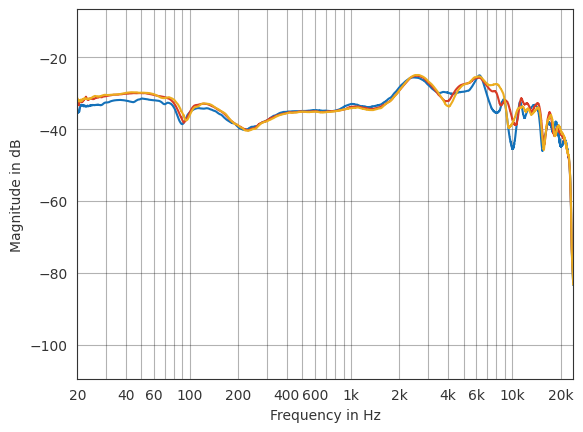

In [11]:

plt.figure()
for index, hptf in enumerate(hp_l):
    smoothed, _ = pf.dsp.smooth_fractional_octave(hptf, 20)
    pf.plot.freq(smoothed)

(1,)
(1,)
(1,)


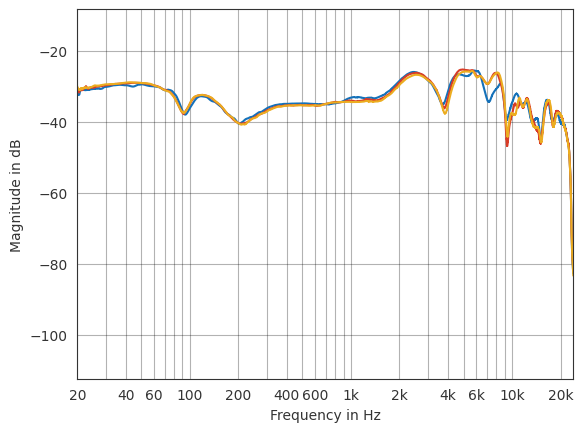

In [12]:
plt.figure()
for index, hptf in enumerate(hp_r):
    smoothed, _ = pf.dsp.smooth_fractional_octave(hptf, 20)
    print(smoothed.cshape)
    pf.plot.freq(smoothed)

In [13]:

hptf_l = pf.utils.concatenate_channels(hp_l)
print(hptf_l.cshape)

hptf_r = pf.utils.concatenate_channels(hp_r)
print(hptf_r.cshape)

(3,)
(3,)


<Axes: title={'center': 'Average HpTF Left'}, xlabel='Frequency in Hz', ylabel='Magnitude in dB'>

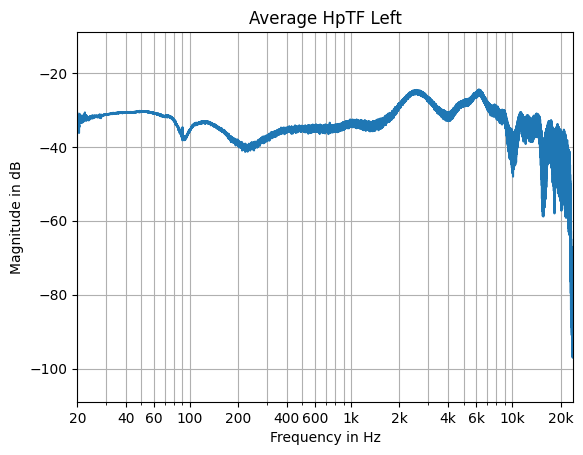

In [14]:
average_hptf_l = pf.dsp.average(hptf_l, mode="magnitude_zerophase")

plt.figure()
plt.title("Average HpTF Left")
pf.plot.freq(average_hptf_l)

<Axes: title={'center': 'Average HpTF Right'}, xlabel='Frequency in Hz', ylabel='Magnitude in dB'>

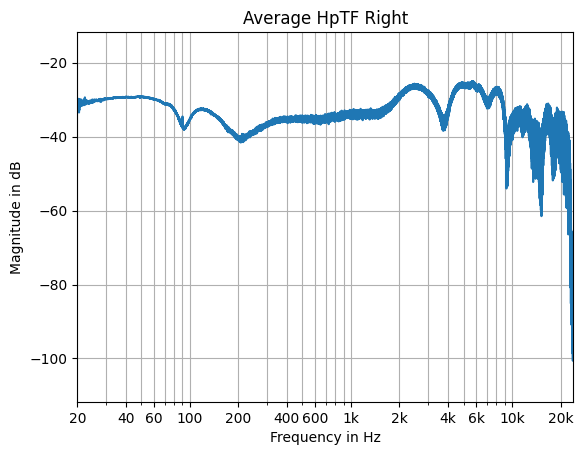

In [15]:
average_hptf_r= pf.dsp.average(hptf_r, mode="magnitude_zerophase")


plt.figure()
plt.title("Average HpTF Right")
pf.plot.freq(average_hptf_r)

In [16]:
pf.io.write_audio(average_hptf_l, r"C:\Users\LinhNguyen\Desktop\BA_Code\dummy_head_test\HpTF\dt770_l.flac")
pf.io.write_audio(average_hptf_r, r"C:\Users\LinhNguyen\Desktop\BA_Code\dummy_head_test\HpTF\dt770_r.flac")